In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
stores = pd.read_csv(r"..\Data\01_raw\stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
stores.shape

(54, 5)

In [5]:
output = []

for column in stores.columns:

    null_values  = np.sum(pd.isna(stores[column]))
    unique = stores[column].nunique()
    column_data_type = stores[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = stores.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
store_nbr,0,54,int64,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
city,0,22,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,0,16,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,0,5,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,0,17,int64,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


In [6]:
stores.drop_duplicates(inplace=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Quito'),
  Text(1, 0, 'Santo Domingo'),
  Text(2, 0, 'Cayambe'),
  Text(3, 0, 'Latacunga'),
  Text(4, 0, 'Riobamba'),
  Text(5, 0, 'Ibarra'),
  Text(6, 0, 'Guaranda'),
  Text(7, 0, 'Puyo'),
  Text(8, 0, 'Ambato'),
  Text(9, 0, 'Guayaquil'),
  Text(10, 0, 'Salinas'),
  Text(11, 0, 'Daule'),
  Text(12, 0, 'Babahoyo'),
  Text(13, 0, 'Quevedo'),
  Text(14, 0, 'Playas'),
  Text(15, 0, 'Libertad'),
  Text(16, 0, 'Cuenca'),
  Text(17, 0, 'Loja'),
  Text(18, 0, 'Machala'),
  Text(19, 0, 'Esmeraldas'),
  Text(20, 0, 'Manta'),
  Text(21, 0, 'El Carmen')])

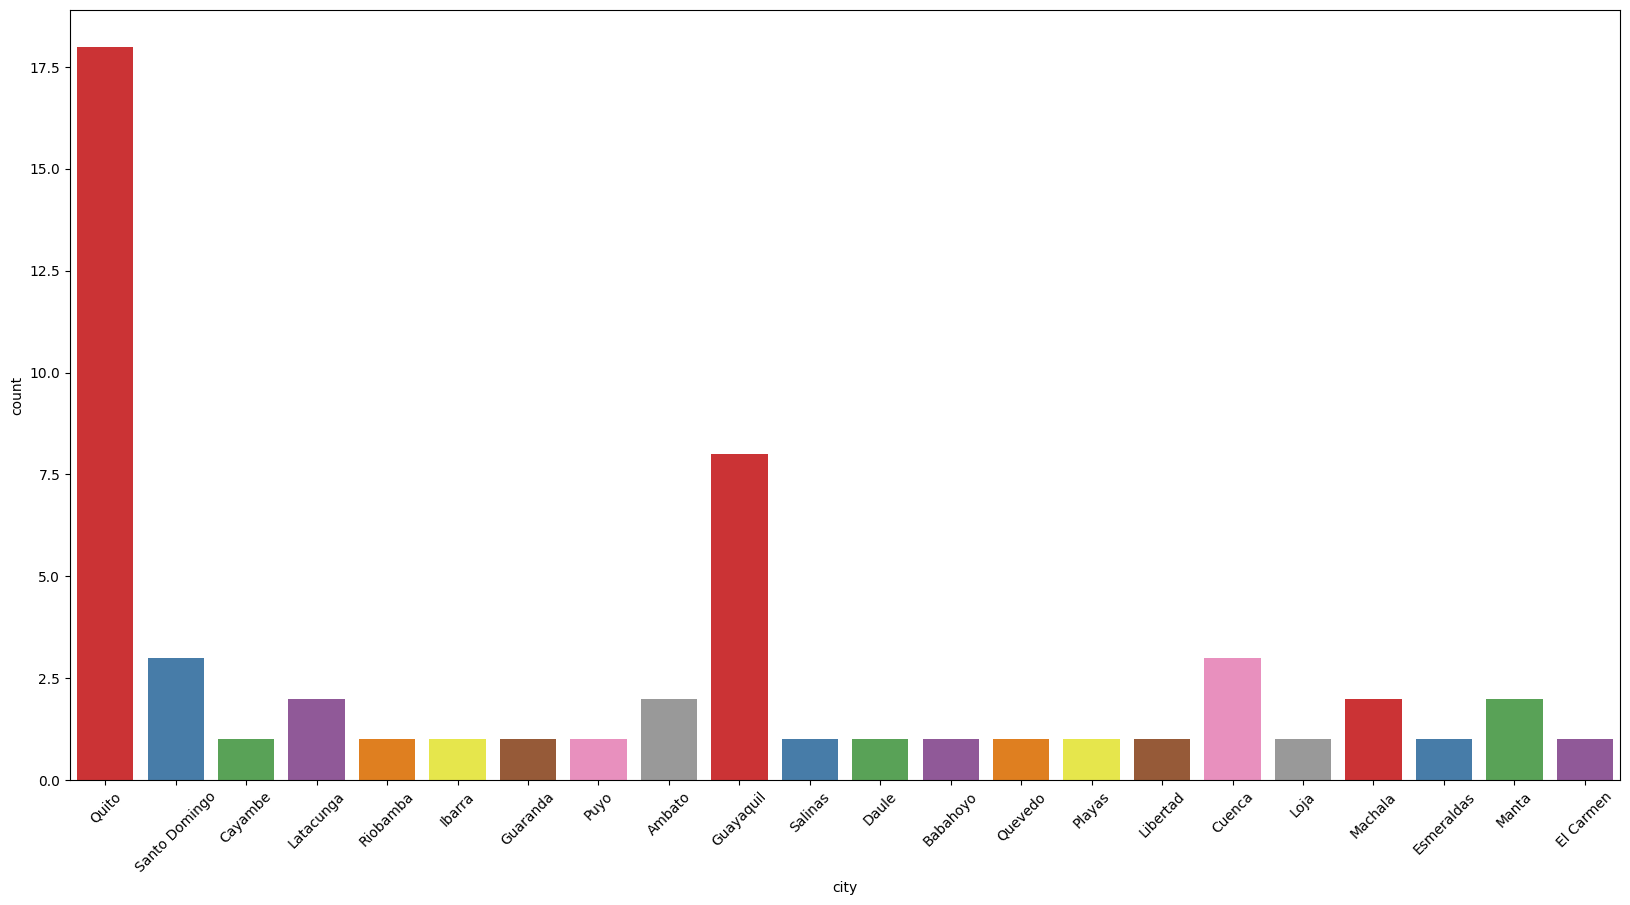

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(data= stores, x='city', hue ='city', palette='Set1')
plt.xticks(rotation = 45)

Quito has maximum number of stores followed by Guayaquil.

Text(0.5, 1.0, 'Number of stores in each cluster')

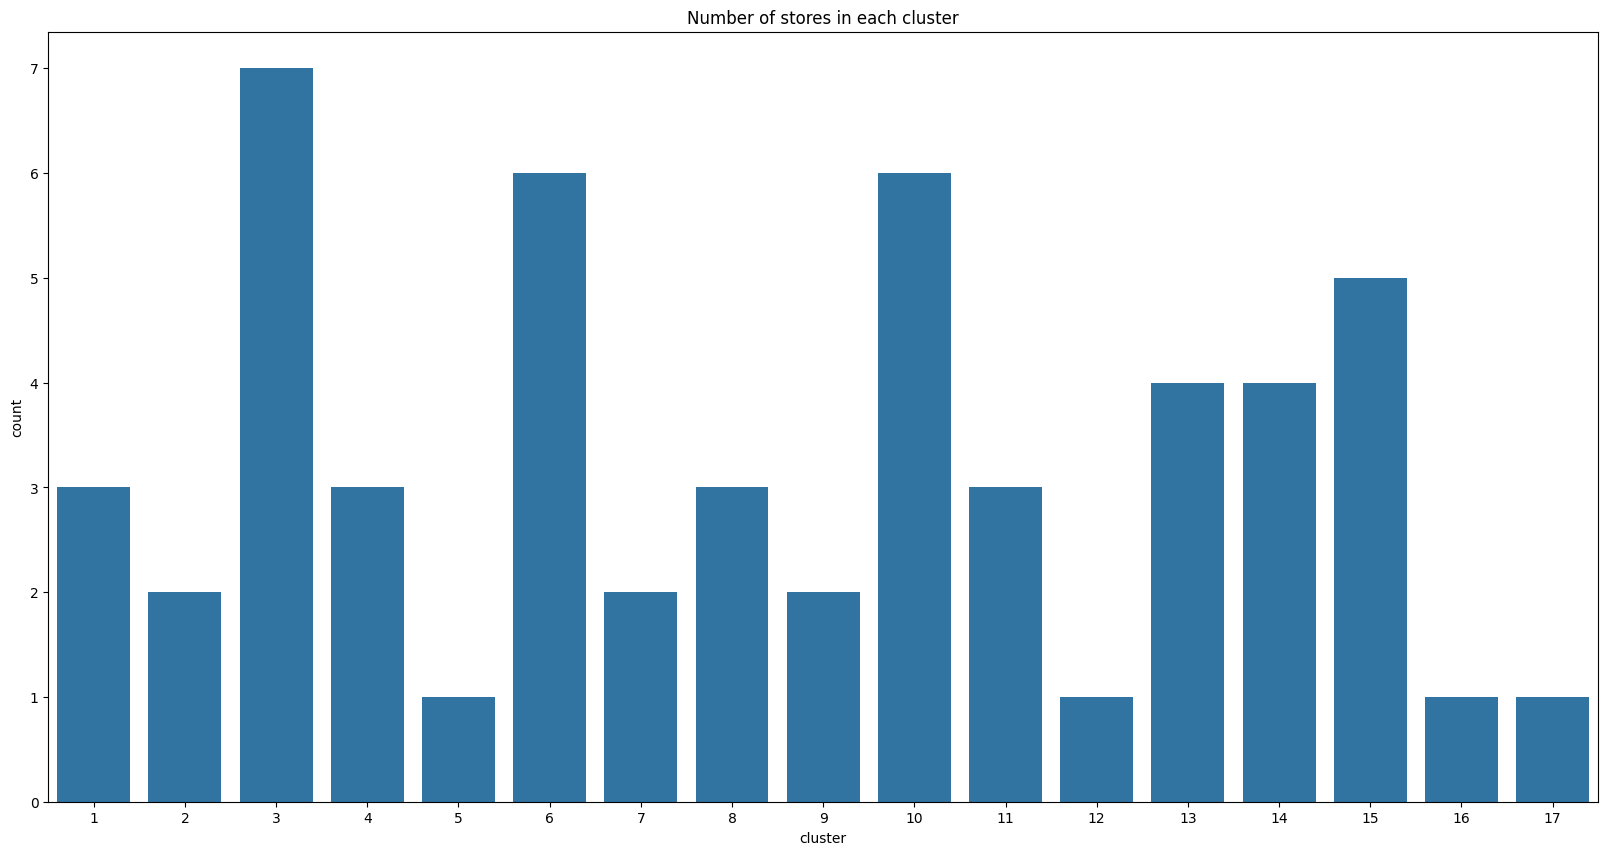

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(data= stores, x='cluster')
plt.title('Number of stores in each cluster')


Text(0.5, 1.0, 'Number of stores in each type')

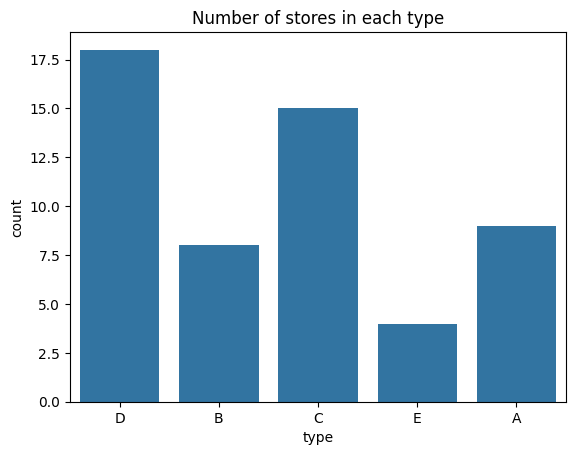

In [33]:
sns.countplot(data= stores, x='type')
plt.title('Number of stores in each type')